## **Project on Regression to predict the retail price of a car**
**Dataset Link:** https://raw.githubusercontent.com/rahulinchal/Car-Price-Prediction-using-Regression/refs/heads/main/Car_data.csv

### **Data Description**
**Make:** Make of a car(BMW, Volkswagen and so on) <br>
**Model:** Model of a car <br>
**Year:** Year when the car was manufactured <br>
**Engine Fuel Type:** Type of fuel engine needs(disel and so on) <br>
**Engine HP:** Horsepower of engine <br>
**Engine Cylinders:** Number of cylinders in engine <br>
**Transmission Type:** Type of transmission(automatic or manual) <br>
**Driven Wheels:** front, rear, all <br>
**Number of Doors:** Number of doors a car has <br>
**Market Category:** luxury, crossover and so on <br>
**Vehicle Size:** compact, midsize, large <br>
**Vehicle Style:** Style of vehicle(sedan, convertible and so on) <br>
**Highway MPG:** miles per gallon(MPG) in highway <br>
**City MPG:** miles per gallon(MPG) in city <br>
**Popularity:** Number of times the car was mentioned in a Twitter stream <br>
**MSRP:** Manufacturer's Suggested Retail Price <br>

### Importing important packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rahulinchal/Car-Price-Prediction-using-Regression/refs/heads/main/Car_data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### renaming the column names

In [3]:
df = df.rename(columns={
    "Engine Fuel Type": "Engine_Fuel_Type",
    "Engine HP": "Engine_HP",
    "Engine Cylinders": "Engine_Cylinders",
    "Transmission Type": "Transmission_Type",
    "Number of Doors": "Number_of_Doors",
    "Market Category": "Market_Category",
    "Vehicle Size": "Vehicle_Size",
    "Vehicle Style": "Vehicle_Style",
    "highway MPG": "highway_MPG",
    "city mpg": "city_mpg"
})


In [4]:
df.shape

(11914, 16)

In [5]:
df.duplicated().sum()

715

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(11199, 16)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11199.0,2010.714528,7.228211,1990.0,2007.0,2015.0,2016.0,2017.0
Engine_HP,11130.0,253.388859,110.150938,55.0,172.0,239.0,303.0,1001.0
Engine_Cylinders,11169.0,5.665950,1.797021,0.0,4.0,6.0,6.0,16.0
Number_of_Doors,11193.0,3.454123,0.872946,2.0,2.0,4.0,4.0,4.0
highway_MPG,11199.0,26.610590,8.977641,12.0,22.0,25.0,30.0,354.0
city_mpg,11199.0,19.731851,9.177555,7.0,16.0,18.0,22.0,137.0
Popularity,11199.0,1558.483347,1445.668872,2.0,549.0,1385.0,2009.0,5657.0
MSRP,11199.0,41925.927136,61535.047817,2000.0,21599.5,30675.0,43032.5,2065902.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine_Fuel_Type   11196 non-null  object 
 4   Engine_HP          11130 non-null  float64
 5   Engine_Cylinders   11169 non-null  float64
 6   Transmission_Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number_of_Doors    11193 non-null  float64
 9   Market_Category    7823 non-null   object 
 10  Vehicle_Size       11199 non-null  object 
 11  Vehicle_Style      11199 non-null  object 
 12  highway_MPG        11199 non-null  int64  
 13  city_mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5), ob

In [10]:
df.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'MSRP'],
      dtype='object')

### Getting the unique values 

In [12]:
for i in df.columns:
    print(i, "\n", df[i].unique(), "\n")

Make 
 ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti'] 

Model 
 ['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scagliett

### Finding the null values

In [13]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_HP              69
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3376
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [14]:
df.drop("Market_Category", axis = 1, inplace = True)

In [15]:
df.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [16]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine_Fuel_Type      3
Engine_HP            69
Engine_Cylinders     30
Transmission_Type     0
Driven_Wheels         0
Number_of_Doors       6
Vehicle_Size          0
Vehicle_Style         0
highway_MPG           0
city_mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [17]:
df = df.dropna()
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine_Fuel_Type     0
Engine_HP            0
Engine_Cylinders     0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      0
Vehicle_Size         0
Vehicle_Style        0
highway_MPG          0
city_mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [18]:
for i in df.columns:
    print(i ,"\n", df[i].unique(), "\n")

Make 
 ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Bugatti'] 

Model 
 ['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500' '500L' '500X' '550' '560-Class' '570S' '575M' '57'
 '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti' '626' '62' '

In [19]:
df = df[df['Engine_Cylinders'] != 0]

In [20]:
df = df[df['Transmission_Type'] != "UNKNOWN"]

In [21]:
df.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11072 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11072 non-null  object 
 1   Model              11072 non-null  object 
 2   Year               11072 non-null  int64  
 3   Engine_Fuel_Type   11072 non-null  object 
 4   Engine_HP          11072 non-null  float64
 5   Engine_Cylinders   11072 non-null  float64
 6   Transmission_Type  11072 non-null  object 
 7   Driven_Wheels      11072 non-null  object 
 8   Number_of_Doors    11072 non-null  float64
 9   Vehicle_Size       11072 non-null  object 
 10  Vehicle_Style      11072 non-null  object 
 11  highway_MPG        11072 non-null  int64  
 12  city_mpg           11072 non-null  int64  
 13  Popularity         11072 non-null  int64  
 14  MSRP               11072 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


### Changing the data type of columns 

In [23]:
df['Engine_HP'] = df['Engine_HP'].astype(int)

In [24]:
df['Engine_Cylinders'] = df['Engine_Cylinders'].astype(int)

In [25]:
df['Number_of_Doors'] = df['Number_of_Doors'].astype(int)

In [26]:
df.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,18,3916,34500


In [27]:
int_columns = df.select_dtypes(include = 'int')

### **Correlation**

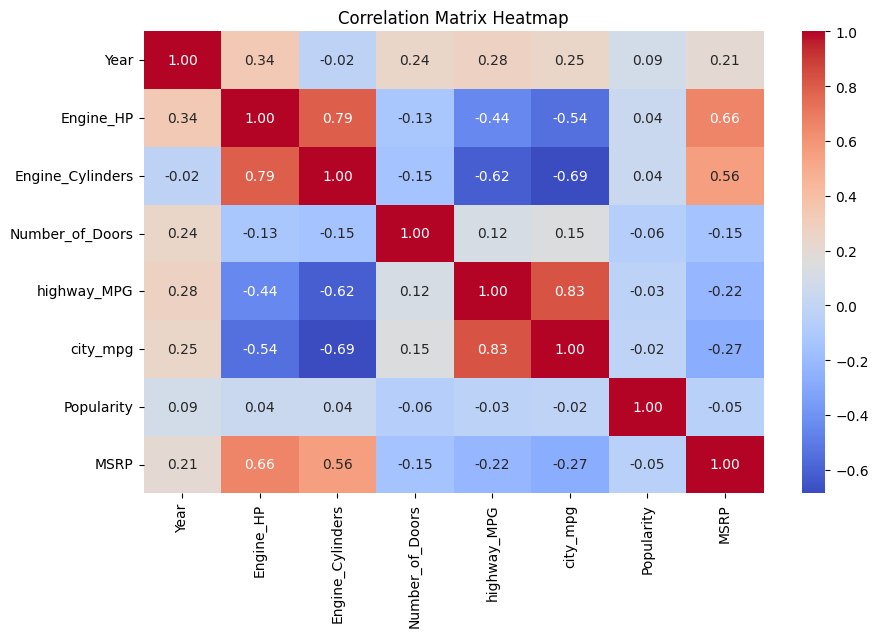

In [28]:
#Heatmap for Correlation Matrix
plt.figure(figsize=(10, 6))
correlation_matrix = int_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Looking for outliers

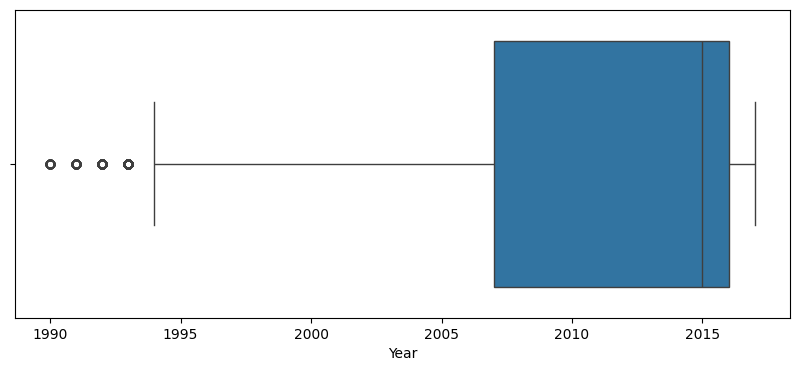

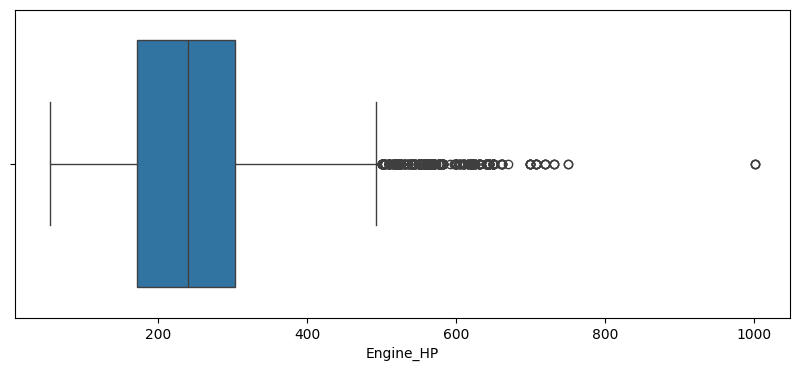

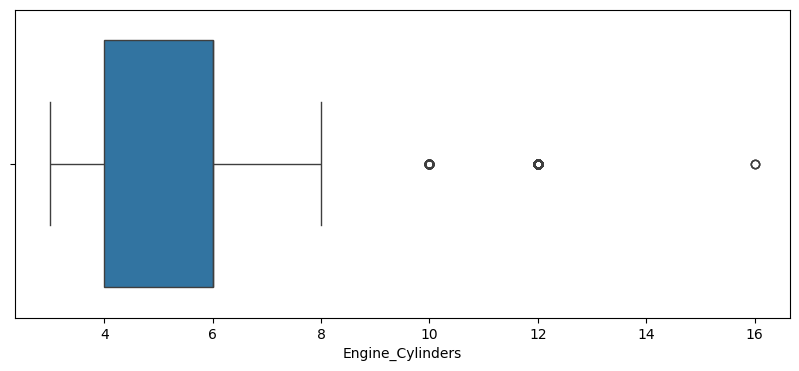

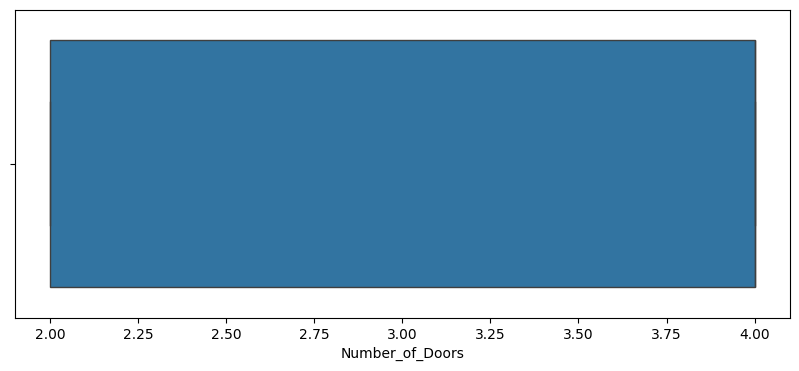

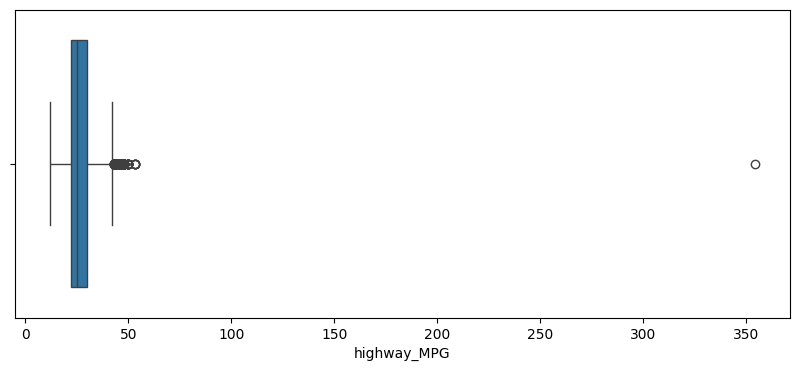

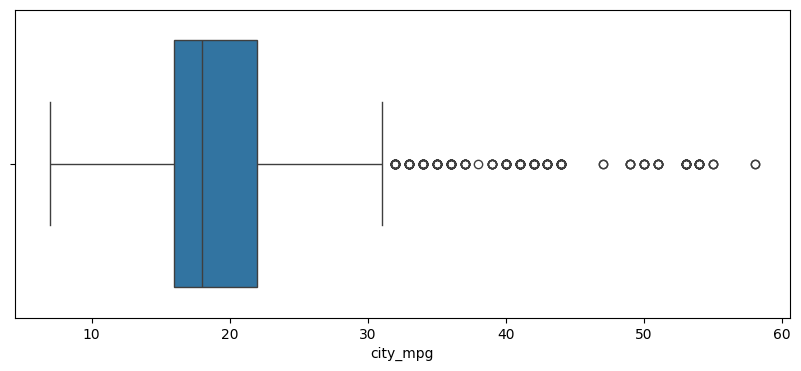

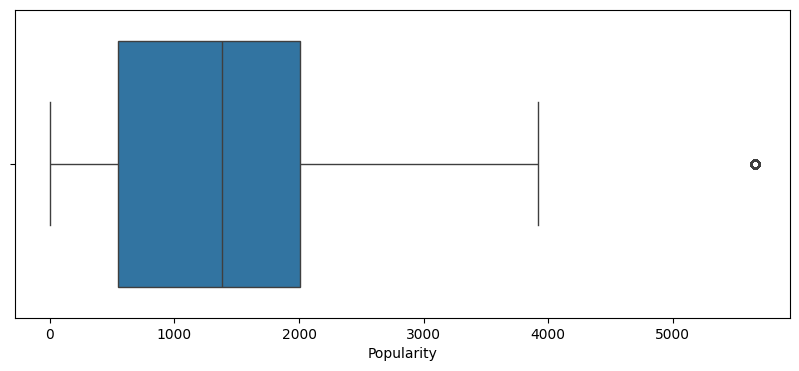

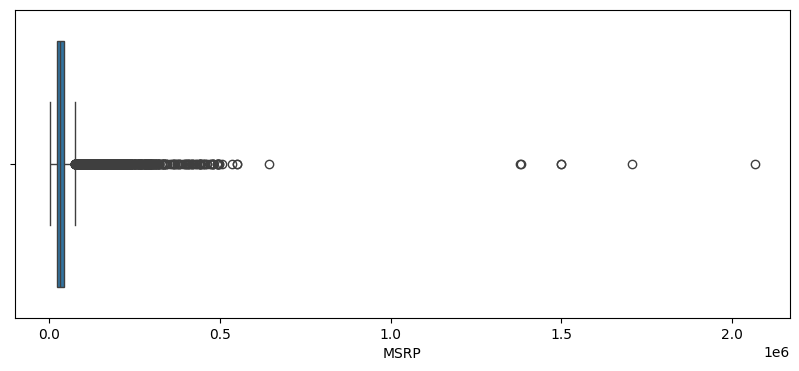

In [29]:
for i in int_columns.columns:
    plt.figure(figsize = (10,4))
    sns.boxplot(x = int_columns[i])
    plt.show()

In [30]:
df = df[df['Engine_HP'] < 800]

In [31]:
df = df[df['Engine_Cylinders'] < 8]

In [32]:
df.shape

(8815, 15)

In [33]:
df =df[df['highway_MPG'] < 53]

In [34]:
df = df[df['MSRP'] < 70000]

<Axes: xlabel='highway_MPG'>

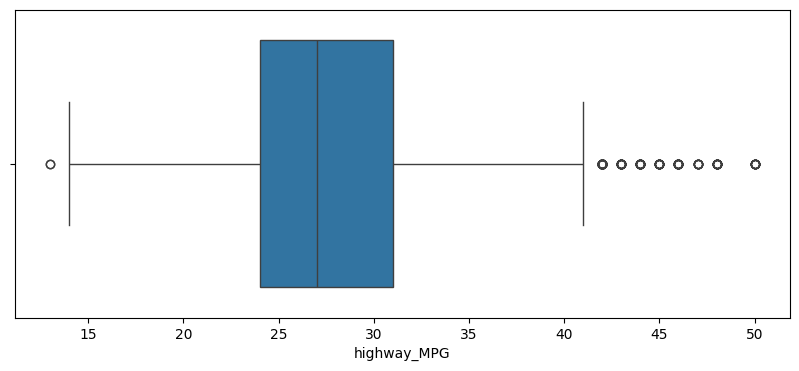

In [35]:
plt.figure(figsize = (10,4))
sns.boxplot(x = df['highway_MPG'])

In [36]:
include_int_after = df.select_dtypes(include = 'int')
include_int_after.head()

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,MSRP
0,2011,335,6,2,26,19,3916,46135
1,2011,300,6,2,28,19,3916,40650
2,2011,300,6,2,28,20,3916,36350
3,2011,230,6,2,28,18,3916,29450
4,2011,230,6,2,28,18,3916,34500


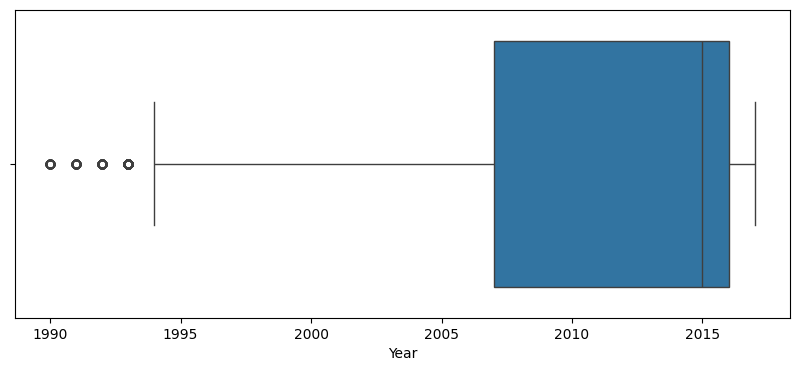

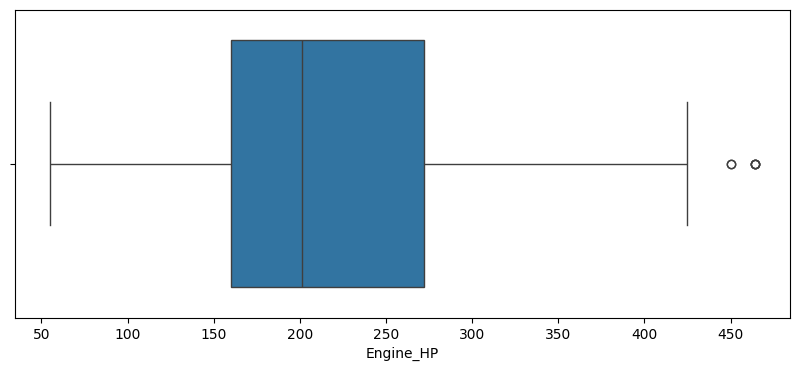

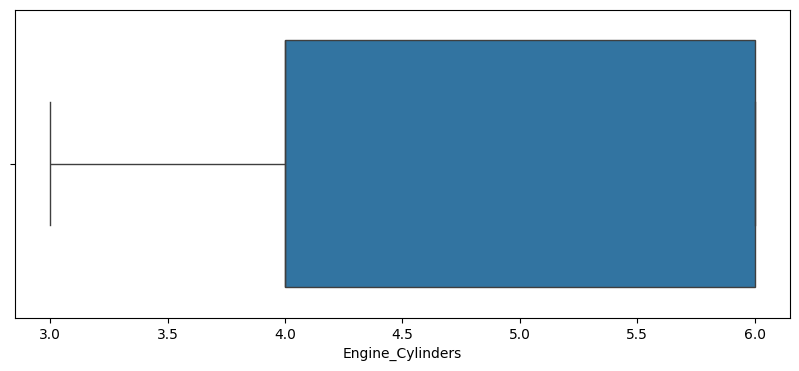

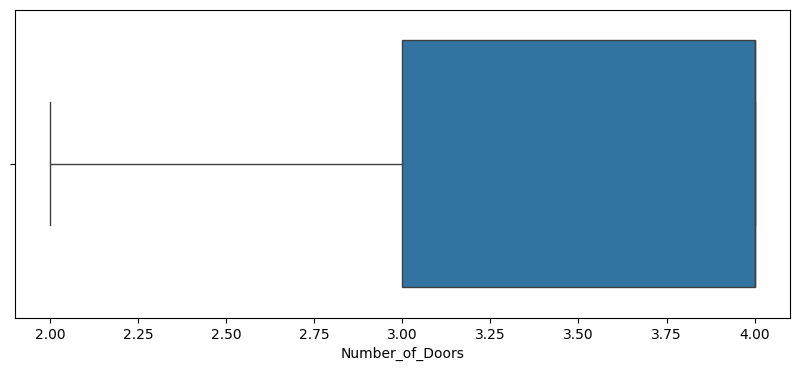

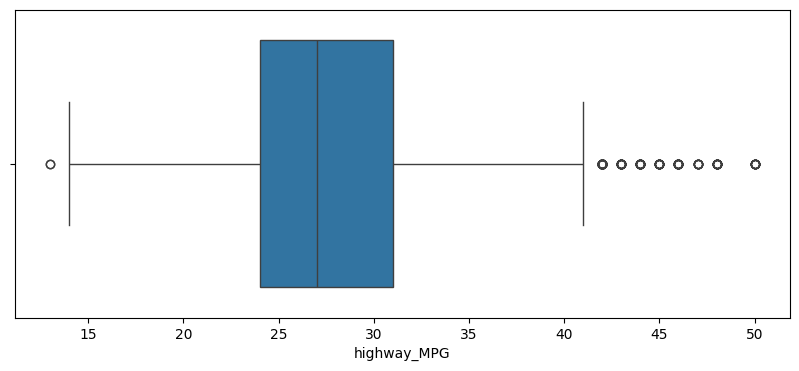

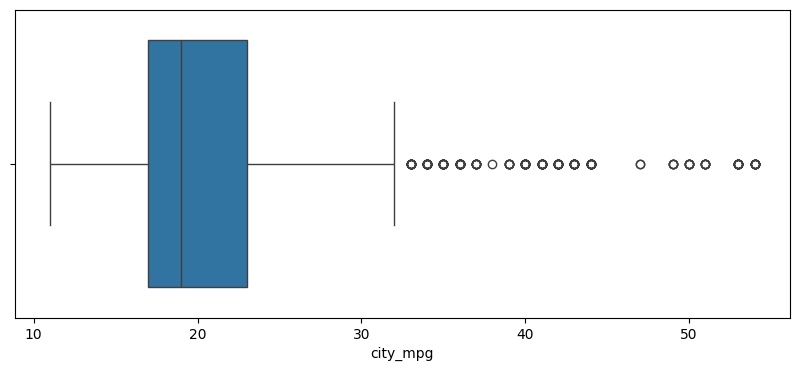

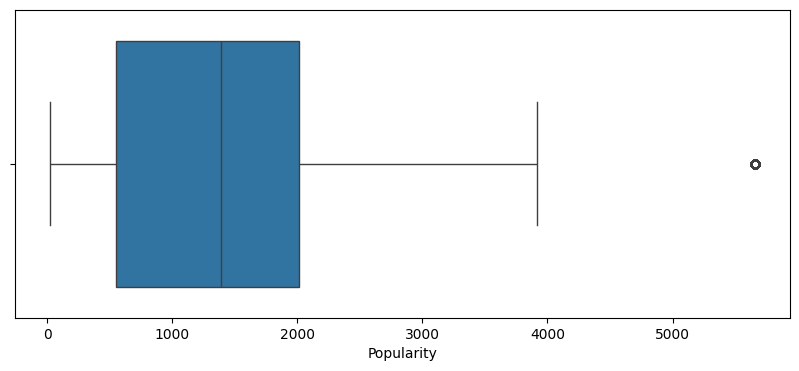

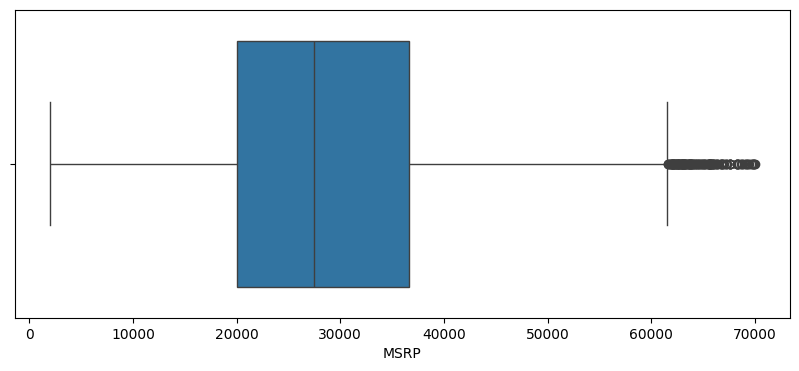

In [37]:
for i in include_int_after.columns:
        plt.figure(figsize = (10,4))
        sns.boxplot(x = include_int_after[i])
        plt.show()

In [38]:
df.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,18,3916,34500


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,8618.0,2010.532374,7.424303,1990.0,2007.0,2015.0,2016.0,2017.0
Engine_HP,8618.0,213.783244,67.720011,55.0,160.0,201.0,272.0,464.0
Engine_Cylinders,8618.0,4.962752,0.994767,3.0,4.0,4.0,6.0,6.0
Number_of_Doors,8618.0,3.516593,0.840412,2.0,3.0,4.0,4.0,4.0
highway_MPG,8618.0,27.780924,5.849574,13.0,24.0,27.0,31.0,50.0
city_mpg,8618.0,20.588420,5.347082,11.0,17.0,19.0,23.0,54.0
Popularity,8618.0,1525.286145,1422.163613,21.0,549.0,1385.0,2009.0,5657.0
MSRP,8618.0,27785.355535,14467.957352,2000.0,20035.0,27477.5,36625.0,69980.0


In [40]:
df.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,18,3916,34500


### **Groupby function**

In [41]:
df.groupby(['Make']).size().sort_values(ascending = False)

Make
Chevrolet        751
Ford             613
Toyota           552
Volkswagen       550
Nissan           478
Honda            431
Mazda            392
Dodge            358
Suzuki           339
GMC              277
Infiniti         277
Volvo            266
Audi             253
Hyundai          250
Acura            241
Subaru           239
Cadillac         236
Kia              216
BMW              204
Mitsubishi       203
Buick            179
Chrysler         178
Mercedes-Benz    177
Pontiac          161
Lexus            141
Oldsmobile       124
Saab             104
Lincoln           97
Plymouth          71
Land Rover        71
Scion             60
FIAT              59
Porsche           34
Lotus             17
HUMMER            11
Alfa Romeo         5
Genesis            2
Maserati           1
dtype: int64

<Axes: xlabel='Make'>

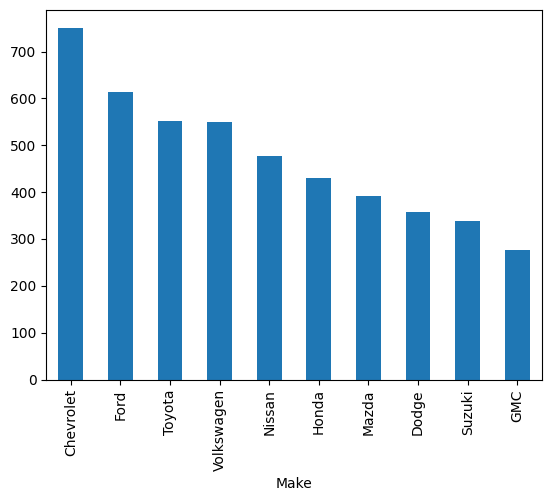

In [42]:
df.groupby(['Make']).size().sort_values(ascending = False).iloc[:10].plot(kind = 'bar')

In [43]:
df.groupby(['Year']).size().sort_values(ascending = False)

Year
2016    1611
2015    1589
2017    1264
2014     363
2009     268
2012     260
2013     238
2008     237
2010     215
2011     212
2007     210
2003     198
2004     185
2002     175
2005     170
2006     160
2001     141
1997     134
1993     134
1994     112
1992     108
1998     105
1996     103
1995     102
2000      94
1991      84
1999      78
1990      68
dtype: int64

## **Exploratory Data Analysis**

## 1. Univariate analysis

### Histogram of MSRP
**Histogram of MSRP**:
   - Shows the distribution of car prices.
   - Highlights any skewness or peaks in the price range.

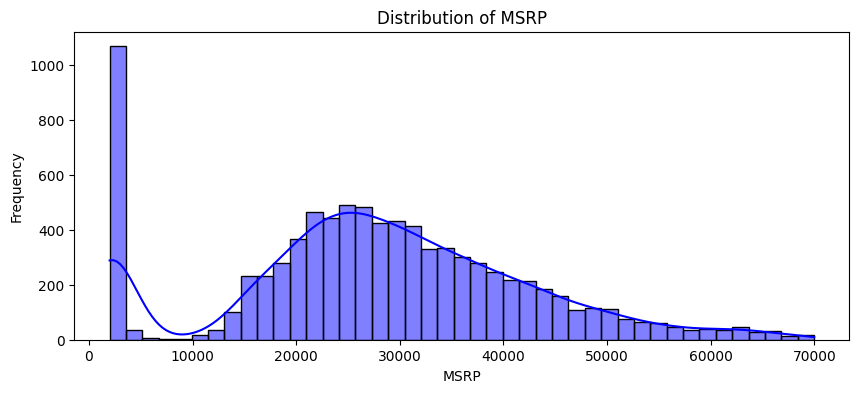

In [44]:
plt.figure(figsize = (10,4))
sns.histplot(df['MSRP'], kde=True, color='blue')
plt.title("Distribution of MSRP")
plt.xlabel("MSRP")
plt.ylabel("Frequency")
plt.show()
plt.show()

### Bar plot for Transmission type
**Bar Plot of Transmission Types**:
   - Displays the count of cars with different transmission types.

Text(0, 0.5, 'Count')

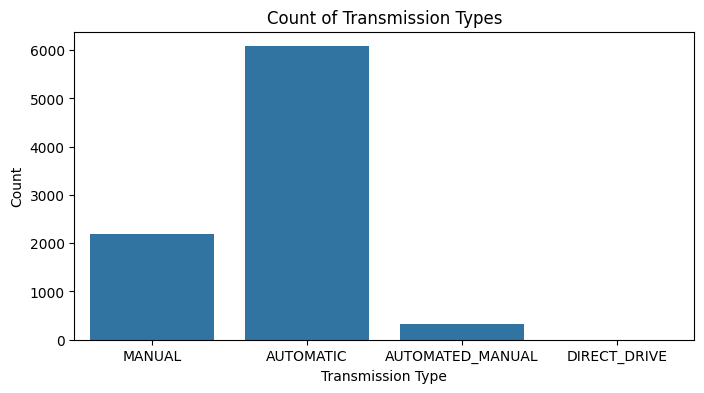

In [45]:
plt.figure(figsize = (8,4))
sns.countplot(data=df, x='Transmission_Type')
plt.title("Count of Transmission Types")
plt.xlabel("Transmission Type")
plt.ylabel("Count")

### Boxplot for Engine HP
**Box Plot of Engine HP**:
   - Highlights the range, median, and any outliers in the `Engine_HP` column.

Text(0, 0.5, 'Engine HP')

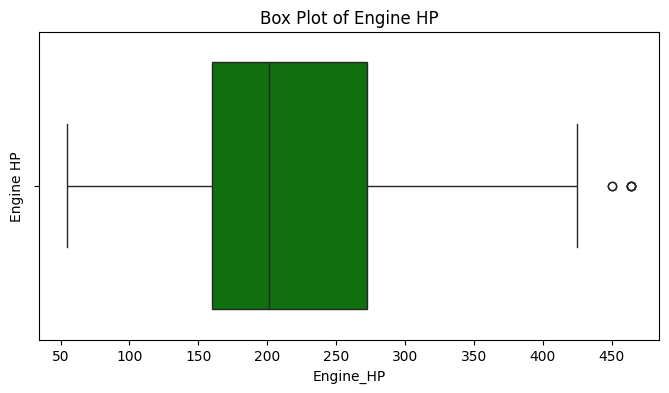

In [46]:
plt.figure(figsize = (8,4))
sns.boxplot(data=df, x='Engine_HP', color='green')
plt.title("Box Plot of Engine HP")
plt.ylabel("Engine HP")

### Scatter plot of Engine_HP vs MSRP
**Scatter Plot of Engine HP vs MSRP**:
   - Examines the relationship between horsepower and car price.
   - Points are color-coded by `Vehicle_Style`.

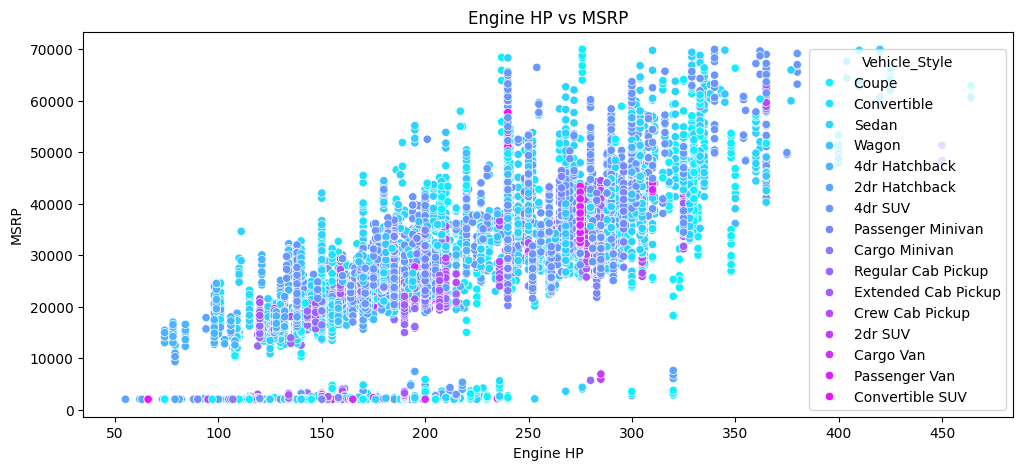

In [47]:
plt.figure(figsize = (12,5))
sns.scatterplot(data=df, x='Engine_HP', y='MSRP', hue='Vehicle_Style', palette='cool')
plt.title("Engine HP vs MSRP")
plt.xlabel("Engine HP")
plt.ylabel("MSRP")
plt.show()

## 2. Bivariate analysis

### Line plot of highway_MPG vs city_mpg
**Line Plot of Highway MPG vs City MPG**:
   - Compares the fuel efficiency in city vs highway.

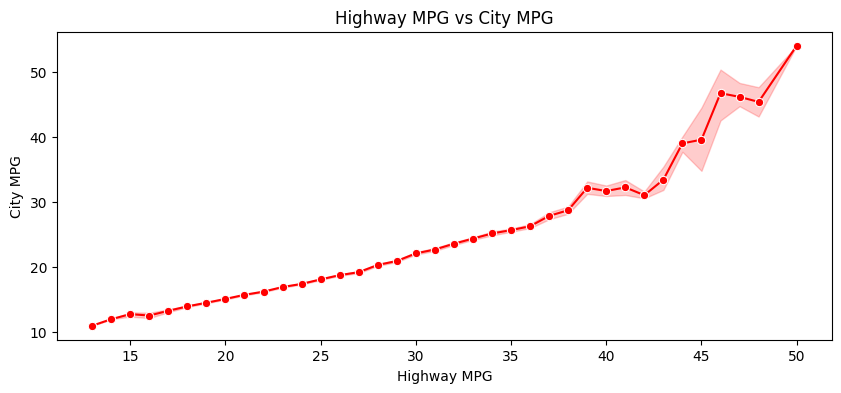

In [48]:
plt.figure(figsize = (10,4))
sns.lineplot(data=df, x='highway_MPG', y='city_mpg', marker='o', color='red')
plt.title("Highway MPG vs City MPG")
plt.xlabel("Highway MPG")
plt.ylabel("City MPG")
plt.show()

### Violin plot of Transmission_Type vs MSRP
**Violin Plot of Transmission Type vs MSRP**:
   - Shows the distribution of car prices (`MSRP`) for each transmission type.

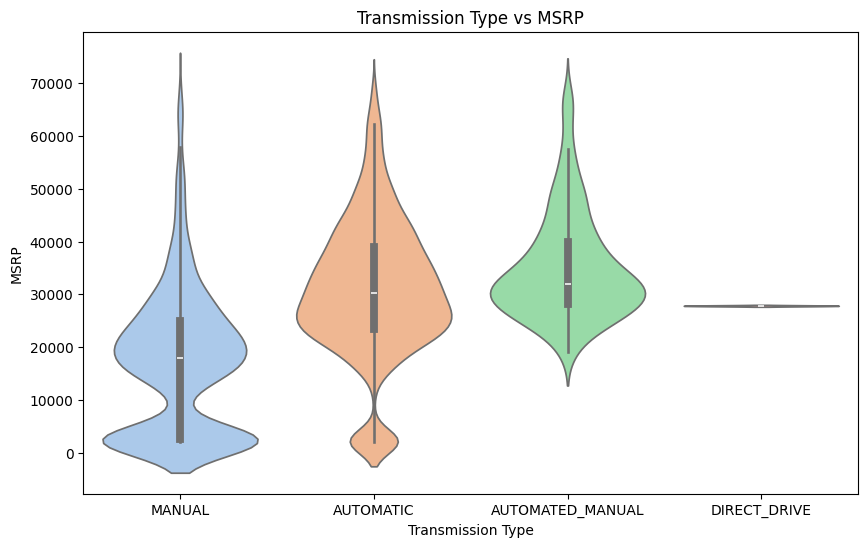

In [49]:
plt.figure(figsize = (10,6))
sns.violinplot(data=df, x='Transmission_Type', y='MSRP', palette="pastel")
plt.title("Transmission Type vs MSRP")
plt.xlabel("Transmission Type")
plt.ylabel("MSRP")
plt.show()

In [50]:
df.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,18,3916,34500


In [51]:
for i in df.columns:
    print(i, "\n", df[i].unique(), "\n")

Make 
 ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Alfa Romeo' 'Toyota' 'Pontiac' 'Porsche' 'Saab' 'GMC'
 'Hyundai' 'Plymouth' 'Honda' 'Oldsmobile' 'Suzuki' 'Ford' 'Kia'
 'Chevrolet' 'Cadillac' 'Dodge' 'Subaru' 'Volkswagen' 'Buick' 'Acura'
 'Lincoln' 'Lexus' 'Land Rover' 'Lotus' 'Infiniti' 'Scion' 'Genesis'
 'Maserati' 'HUMMER'] 

Model 
 ['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '4C' '4Runner' '5 Series Gran Turismo'
 '5 Series' '500' '500L' '500X' '5' '6000' '626' '6' '718 Cayman' '740'
 '760' '780' '80' '850' '86' '9-2X' '9-3 Griffin' '9-3' '9-4X' '9-5'
 '9-7X' '9000' '900' '90' '929' '940' '944' '960' '968' 'A3' 'A4 allroad'
 'A4' 'A5' 'A6' 'A7' 'Acadia Limited' 'Acadia' 'Accent' 'Acclaim'
 'Accord Crosstour' 'Accord Hybrid' 'Accord Plu

### Dropping all those colums which donot contruibute towards the dependent variable 

In [52]:
df = df.drop(['Make', 'Model', 'Engine_Fuel_Type', 'Vehicle_Style'], axis = 1)
df.head()

,Year,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,highway_MPG,city_mpg,Popularity,MSRP
0,2011,335,6,MANUAL,rear wheel drive,2,Compact,26,19,3916,46135
1,2011,300,6,MANUAL,rear wheel drive,2,Compact,28,19,3916,40650
2,2011,300,6,MANUAL,rear wheel drive,2,Compact,28,20,3916,36350
3,2011,230,6,MANUAL,rear wheel drive,2,Compact,28,18,3916,29450
4,2011,230,6,MANUAL,rear wheel drive,2,Compact,28,18,3916,34500


## **One hot encoding**
### **Label Encoding**
- Each unique category is assigned a unique integer.
- Example: Suppose you have a list of colors:  
  `["Red", "Green", "Blue", "Green", "Red"]`  
  After label encoding:  
  `Red -> 0, Green -> 1, Blue -> 2`  
  Result: `[0, 1, 2, 1, 0]`

---

### **One-Hot Encoding**
- Each category is represented by a binary vector (0s and 1s).
- Example: For the same list of colors `["Red", "Green", "Blue", "Green", "Red"]`, you create separate columns for each category:  
  ```
  Red   Green   Blue
  1      0       0     # Red
  0      1       0     # Green
  0      0       1     # Blue
  0      1       0     # Green
  1      0       0     # Red
  ```

---
- **Label Encoding**: Assigns numbers (0, 1, 2...) to each category.
- **One-Hot Encoding**: Creates separate columns for each category with binary indicators.

In [53]:
df = pd.get_dummies(df, columns=['Transmission_Type', 'Driven_Wheels', 'Vehicle_Size'], prefix=['Transmission', 'Driven', 'Size'])

In [54]:
df.head()

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,MSRP,Transmission_AUTOMATED_MANUAL,Transmission_AUTOMATIC,Transmission_DIRECT_DRIVE,Transmission_MANUAL,Driven_all wheel drive,Driven_four wheel drive,Driven_front wheel drive,Driven_rear wheel drive,Size_Compact,Size_Large,Size_Midsize
0,2011,335,6,2,26,19,3916,46135,False,False,False,True,False,False,False,True,True,False,False
1,2011,300,6,2,28,19,3916,40650,False,False,False,True,False,False,False,True,True,False,False
2,2011,300,6,2,28,20,3916,36350,False,False,False,True,False,False,False,True,True,False,False
3,2011,230,6,2,28,18,3916,29450,False,False,False,True,False,False,False,True,True,False,False
4,2011,230,6,2,28,18,3916,34500,False,False,False,True,False,False,False,True,True,False,False


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 0 to 11913
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Year                           8618 non-null   int64
 1   Engine_HP                      8618 non-null   int64
 2   Engine_Cylinders               8618 non-null   int64
 3   Number_of_Doors                8618 non-null   int64
 4   highway_MPG                    8618 non-null   int64
 5   city_mpg                       8618 non-null   int64
 6   Popularity                     8618 non-null   int64
 7   MSRP                           8618 non-null   int64
 8   Transmission_AUTOMATED_MANUAL  8618 non-null   bool 
 9   Transmission_AUTOMATIC         8618 non-null   bool 
 10  Transmission_DIRECT_DRIVE      8618 non-null   bool 
 11  Transmission_MANUAL            8618 non-null   bool 
 12  Driven_all wheel drive         8618 non-null   bool 
 13  Driven_four wheel driv

### **Model Prep**

In [56]:
x = df.drop(['MSRP'], axis = 1).values
y = df['MSRP'].values

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

### **Scaling**

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### **Importing Linear Regression**

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### **Predicting the result** 

In [61]:
y_pred = lr.predict(x_test)
y_pred

array([27757.34237416, 21725.34237416, 25029.34237416, ...,
       29634.84947668, 32818.84947668, 39325.34237416])

In [62]:
y_train

array([25425, 36550, 16105, ..., 45675, 25045, 34290])

### **Checking the accuracy**

In [63]:
print("Trainig Score: ",(lr.score(x_train, y_train))*100,"%")
print("Testing Score: ",(lr.score(x_test, y_test))*100,"%")

Trainig Score:  76.8910122918611 %
Testing Score:  75.59554455620152 %


### **Visulaising through scatter plot**

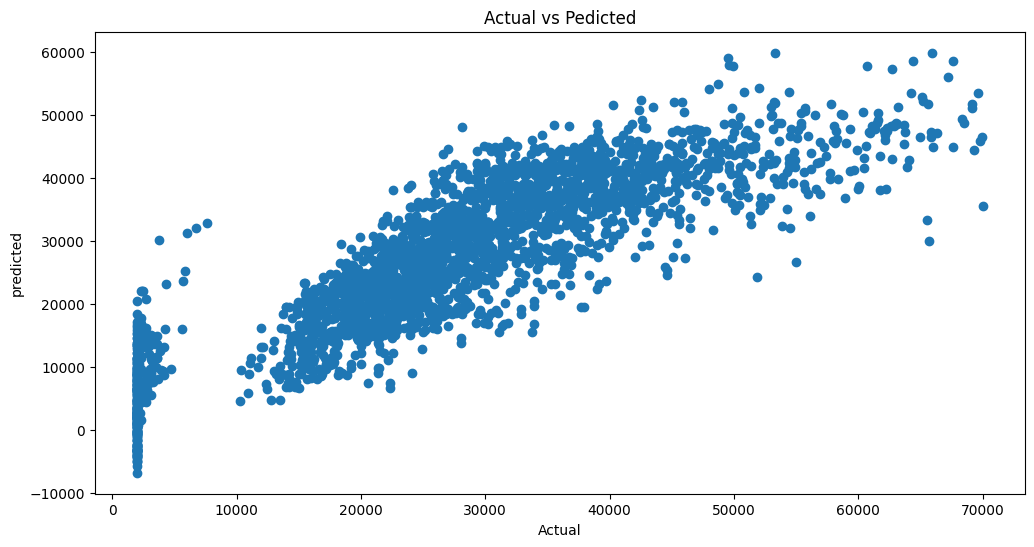

In [64]:
# Visualizing the actual and predicted values
plt.figure(figsize = (12,6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Pedicted')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [65]:
# Getting the difference between actial and predicted value
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred.astype(int), 'Difference': y_test - y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
1909,33795,28093,5701.657626
2306,45295,41045,4249.657626
2320,2000,8482,-6482.849477
408,20095,22834,-2739.849477
236,25895,30333,-4438.342374
518,27490,21773,5716.657626
1695,48900,42706,6193.150523
87,42300,38290,4009.150523
1227,56670,42466,14203.150523
1635,29945,27757,2187.657626


### **Evaluating the Error coefficients**

In [66]:
# Importing Evaluation metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, y_pred)
print("R2 Linear regression :" ,r2*100)

MSE : 51355559.55002777
RMSE : 7166.2793379847935
R2 Linear regression : 75.59554455620152


### **Decision tree regressor**

In [67]:
# Importing the packages
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=14)

# Fitting the train model
decision_tree.fit(x_train, y_train)

# Predicting from the model 
DT_y_pred = decision_tree.predict(x_test)
DT_y_train = decision_tree.predict(x_train)

# Finding the error
MSE = mean_squared_error(y_test,DT_y_pred)
print("MSE:", MSE)

# Root mean squared error
RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)

# Adjusted r2
r2 = r2_score(y_test, DT_y_pred)
print("R2 for Decision Tree Regressor : ", r2*100)

MSE: 15165103.27083668
RMSE : 3894.2397551815784
R2 for Decision Tree Regressor :  92.79345624278109


### **Checking the Accuracy**

In [68]:
print("Trainig Score: ",(decision_tree.score(x_train, y_train))*100,"%")
print("Testing Score: ",(decision_tree.score(x_test, y_test))*100,"%")

Trainig Score:  97.38470602682973 %
Testing Score:  92.79345624278109 %


In [69]:
# Calculating the difference between actual value and predicted value
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': DT_y_pred, 'Difference': y_test - DT_y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
1770,29995,28295.000000,1700.000000
1812,2000,2000.000000,0.000000
2145,30135,25595.000000,4540.000000
173,43640,43779.166667,-139.166667
1202,2032,2040.500000,-8.500000
352,27745,29455.000000,-1710.000000
2482,28300,28395.833333,-95.833333
2420,39080,36660.000000,2420.000000
1165,42870,36953.250000,5916.750000
2214,2000,2000.000000,0.000000


### **Random Forest Regresoor**

In [70]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor

# Setting the hyperparameter values
random_forest = RandomForestRegressor(n_estimators = 20, max_depth=8)
random_forest.fit(x_train,y_train)
rf_y_pred = random_forest.predict(x_test)

# Mean squared error
MSE = mean_squared_error(y_test, rf_y_pred)
print("MSE :", MSE)

# Root mean squared error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R2
r2 = r2_score(y_test, rf_y_pred)
print("R2 for Random Forest :", r2*100)

MSE : 19840138.513317876
RMSE : 4454.227038815812
R2 for Random Forest : 90.5718527733032


In [71]:
print("Trainig Score: ",(random_forest.score(x_train, y_train))*100,"%")
print("Testing Score: ",(random_forest.score(x_test, y_test))*100,"%")

Trainig Score:  92.19815222950291 %
Testing Score:  90.5718527733032 %


In [72]:
# Calculating the difference between actual and predicted value
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': rf_y_pred, 'Difference': y_test - rf_y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
387,35705,37532.513993,-1827.513993
1430,24695,25105.449518,-410.449518
2177,2000,2007.712673,-7.712673
1932,37900,38994.896174,-1094.896174
1575,39720,36181.778549,3538.221451
2390,2000,2001.238776,-1.238776
307,27230,28240.380044,-1010.380044
2300,36555,35430.070316,1124.929684
154,2000,2050.046074,-50.046074
1043,32395,40791.099615,-8396.099615


### **Printing all the accuracu using data frame**

In [73]:
overall_scores = pd.DataFrame({'Linear Regression': ((lr.score(x_train, y_train))*100, (lr.score(x_test, y_test))*100),
                              'Decision Tree Regressor': ((decision_tree.score(x_train, y_train))*100, (decision_tree.score(x_test, y_test))*100),
                              'Random Forest Regressor': ((random_forest.score(x_train, y_train))*100, (random_forest.score(x_test, y_test))*100)})
overall_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})

,Training Score,Test Score
Linear Regression,76.891012,75.595545
Decision Tree Regressor,97.384706,92.793456
Random Forest Regressor,92.198152,90.571853


### **Observations**
- **Linear Regression**: Balanced, but potentially underfits due to lower performance compared to tree-based models.  
- **Decision Tree Regressor**: Strong performance but shows slight overfitting due to the gap between training and test scores.  
- **Random Forest Regressor**: Best balance between high performance and generalization, making it the most robust model among the three for this data.